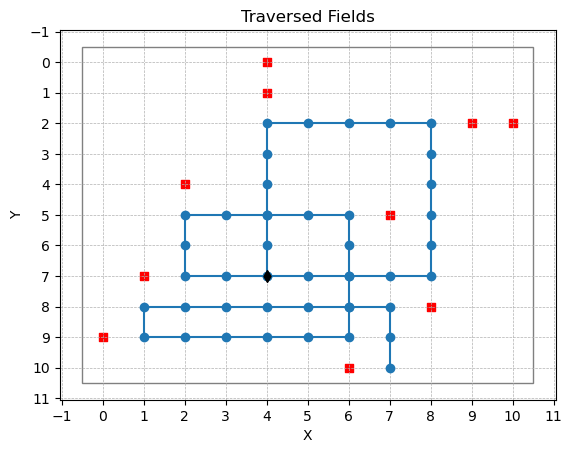

Part 1: 41


In [5]:
import numpy as np
from matplotlib import pyplot as plt

with open("test.txt", "r") as file:
    dmap = [[char for char in line if not char == "\n"] for line in file.readlines()]


Directions = {
        0: np.array([0, -1]), # Up
        1: np.array([1, 0]), # Left
        2: np.array([0, 1]), # Down
        3: np.array([-1, 0])} # Right

class Guard:
    def __init__(self, xi, yi, direction: int):
        self.pos = np.array([xi, yi])
        self.direction = direction
    
    def __repr__(self):
        return f"Guard on [{self.pos}], Facing {Directions[self.direction]}"
    
    def move(self):
        self.pos += Directions[self.direction]
        return self.pos

    def rotate(self, counterclockwise = False):
        if counterclockwise:
            self.direction -= 1
        else:
            self.direction += 1
            
        if self.direction == 4:
            self.direction = 0
        if self.direction == -1:
            self.direction = 3
        return self.direction

    def checkValidMove(self, pos_indexes, mapshape):
        """Returns:
            1 if guard can move forward
            0 if guard cant move forwad
            -1 if guard left the area
        """
        propsedPos = self.pos + Directions[self.direction]
        # print(propsedPos, "=?=", obstacle_indexes)
        px, py = propsedPos
        
        # 1. check if guard is out of bounds
        if not (px >= 0 and py >= 0 and px < mapshape[0] and py < mapshape[1]):
            return -1
        # 1. check if guard is in front of obstacle
        elif np.any(np.all(propsedPos == pos_indexes, axis=1)):
            return 0
        # 2. Guard can move forwad
        else:
            return 1


obstacle_indexes = np.array([])
guard = None
for y, row in enumerate(dmap):
    for x, field in enumerate(row):
        if field == "#":
            if obstacle_indexes.size == 0:
                obstacle_indexes = np.array([x, y])
            else:
                obstacle_indexes = np.vstack([obstacle_indexes, [x, y]])
        if field == "^":
            guard = Guard(x, y, 0)



traversedFields = np.array([guard.pos])
while True:
    movestatus = guard.checkValidMove(obstacle_indexes, np.array(dmap).shape)
    if movestatus == 0:
        guard.rotate()
    if movestatus == -1:
        break

    m = guard.move()
    traversedFields = np.vstack([traversedFields, m]) if traversedFields.size else np.array([m])



plt.scatter(np.transpose(obstacle_indexes)[0], np.transpose(obstacle_indexes)[1], marker='s', color="r")
plt.scatter(traversedFields[0][0], traversedFields[0][1], color="black", zorder=5, marker="d")

plt.plot(traversedFields[:, 0], traversedFields[:, 1], marker='o')
plt.title('Traversed Fields')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), len(dmap[0]), len(dmap), fill=None, edgecolor='gray', linewidth=1))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().invert_yaxis()
plt.show()

print("Part 1:", len(np.unique(traversedFields, axis=0)))


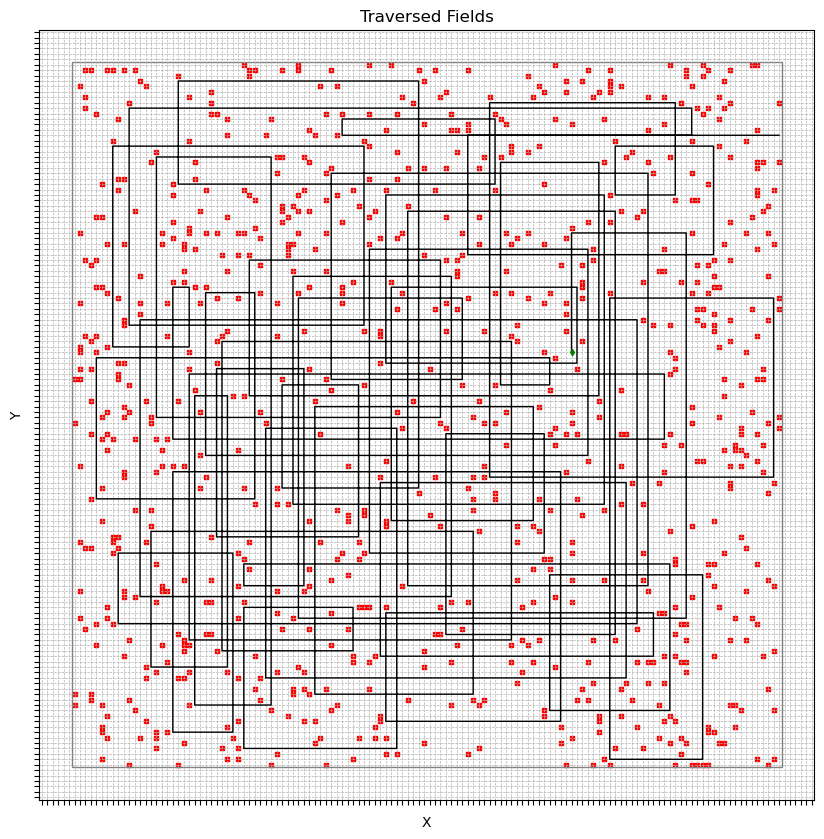

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(np.transpose(obstacle_indexes)[0], np.transpose(obstacle_indexes)[1], marker='s', color="r", s=5)
plt.scatter(traversedFields[0][0], traversedFields[0][1], color="green", zorder=5, marker="d", s=10)

plt.plot(traversedFields[:, 0], traversedFields[:, 1], markersize=2, color = "black", linewidth=1)
plt.title('Traversed Fields')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), len(dmap[0]), len(dmap), fill=None, edgecolor='gray', linewidth=1))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().invert_yaxis()
plt.show()

# Time to optimise yeeeey!
`Above code runs in 18 seconds which is unacceptable!`

Instead of moving over each tile, I can compute which obstacle guard is going to hit next->
1. Look at guards direction
2. FInd all obstacles, that are in same direction [eg, direction `(0, 1)` -> search all obstacles with `y` greater than guards y]
3. For all those obstacles, find the one with smallest distance from guard

You now move guard to location one smaller of obstacle in that direction

[4 1]
[4 1]
[4 1]
[4 1]
[4 1]
[4 1]
None
None
None
None
[8 8]
[8 8]
[8 8]
[8 8]
[8 8]
None
None
None
None
None
None
[2 4]
[2 4]
None
None
None
None
[ 6 10]
[ 6 10]
[ 6 10]
[ 6 10]
None
None
None
None
None
[1 7]
None
None
None
None
None
None
None
None


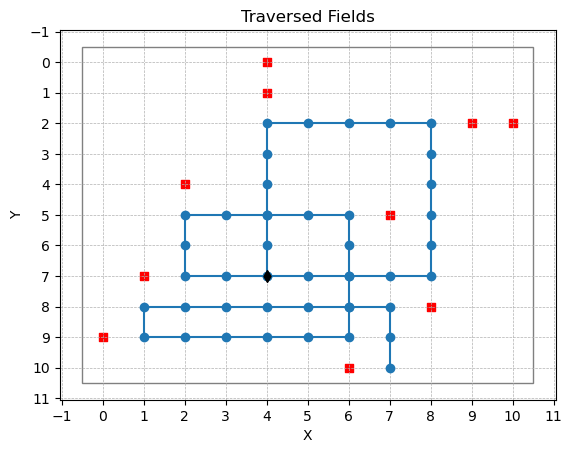

Part 1: 41


In [9]:
import numpy as np
from matplotlib import pyplot as plt

with open("test.txt", "r") as file:
    dmap = [[char for char in line if not char == "\n"] for line in file.readlines()]


Directions = {
        0: np.array([0, -1]), # Up
        1: np.array([1, 0]), # Left
        2: np.array([0, 1]), # Down
        3: np.array([-1, 0])} # Right

class Guard:
    def __init__(self, xi, yi, direction: int):
        self.pos = np.array([xi, yi])
        self.direction = direction
    
    def __repr__(self):
        return f"Guard on [{self.pos}], Facing {Directions[self.direction]}"
    
    def move(self):
        self.pos += Directions[self.direction]
        return self.pos

    def rotate(self, counterclockwise = False):
        if counterclockwise:
            self.direction -= 1
        else:
            self.direction += 1
            
        if self.direction == 4:
            self.direction = 0
        if self.direction == -1:
            self.direction = 3
        return self.direction

    def checkValidMove(self, pos_indexes, mapshape):
        """Returns:
            1 if guard can move forward
            0 if guard cant move forwad
            -1 if guard left the area
        """
        propsedPos = self.pos + Directions[self.direction]
        # print(propsedPos, "=?=", obstacle_indexes)
        px, py = propsedPos
        
        # 1. check if guard is out of bounds
        if not (px >= 0 and py >= 0 and px < mapshape[0] and py < mapshape[1]):
            return -1
        # 1. check if guard is in front of obstacle
        elif np.any(np.all(propsedPos == pos_indexes, axis=1)):
            return 0
        # 2. Guard can move forwad
        else:
            return 1
        
    def GetNextPosition(self, Obstacles, mapshape):
        """Returns: 
        - next spot guard can move to 
        - None if guard goes out of map
        """
        # 1. Look at guards direction
        # 2. FInd all obstacles, that are in same direction [eg, direction `(0, 1)` -> search all obstacles with `y` greater than guards y] but on same x coordinate
        # 3. For all those obstacl es, find the one with smallest distance from guard
        
        relevant_obstacles = np.array([])

        if self.direction == 0:  # Up # take obstacle with biggest y
            relevant_obstacles = Obstacles[(Obstacles[:, 1] < self.pos[1]) & (Obstacles[:, 0] == self.pos[0])]
            if relevant_obstacles.size > 0:
                return relevant_obstacles[np.argmax(relevant_obstacles[:, 1])]
        elif self.direction == 1:  # Left
            relevant_obstacles = Obstacles[(Obstacles[:, 0] < self.pos[0]) & (Obstacles[:, 1] == self.pos[1])]
            if relevant_obstacles.size > 0:
                return relevant_obstacles[np.argmin(relevant_obstacles[:, 0])]
        elif self.direction == 2:  # Down
            relevant_obstacles = Obstacles[(Obstacles[:, 1] > self.pos[1]) & (Obstacles[:, 0] == self.pos[0])]
            if relevant_obstacles.size > 0:
                return relevant_obstacles[np.argmin(relevant_obstacles[:, 1])]
        elif self.direction == 3:  # Right
            relevant_obstacles = Obstacles[(Obstacles[:, 0] > self.pos[0]) & (Obstacles[:, 1] == self.pos[1])]
            if relevant_obstacles.size > 0:
                return relevant_obstacles[np.argmax(relevant_obstacles[:, 0])]

        if relevant_obstacles.size == 0: # if there are no obstacles, guard will run off the map
            return None # Actually, return edge og map, where guard will exit area AND somehow mark end
        

obstacle_indexes = np.array([])
guard = None
for y, row in enumerate(dmap):
    for x, field in enumerate(row):
        if field == "#":
            if obstacle_indexes.size == 0:
                obstacle_indexes = np.array([x, y])
            else:
                obstacle_indexes = np.vstack([obstacle_indexes, [x, y]])
        if field == "^":
            guard = Guard(x, y, 0)



traversedFields = np.array([guard.pos])
while True:
    movestatus = guard.checkValidMove(obstacle_indexes, np.array(dmap).shape)
    print(guard.GetNextPosition(obstacle_indexes, np.array(dmap).shape))
    
    if movestatus == 0:
        guard.rotate()
    if movestatus == -1:
        break

    m = guard.move()
    traversedFields = np.vstack([traversedFields, m]) if traversedFields.size else np.array([m])


plt.scatter(np.transpose(obstacle_indexes)[0], np.transpose(obstacle_indexes)[1], marker='s', color="r")
plt.scatter(traversedFields[0][0], traversedFields[0][1], color="black", zorder=5, marker="d")

plt.plot(traversedFields[:, 0], traversedFields[:, 1], marker='o')
plt.title('Traversed Fields')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), len(dmap[0]), len(dmap), fill=None, edgecolor='gray', linewidth=1))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().invert_yaxis()
plt.show()

print("Part 1:", len(np.unique(traversedFields, axis=0)))
